In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("breast-cancer.csv")

# Drop the ID column (not useful for ML)
df.drop("id", axis=1, inplace=True)

# Convert diagnosis to binary (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select 2 features for visualization
X = df[['radius_mean', 'texture_mean']]
y = df['diagnosis']

#Print a few rows to verify
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())



Features (X):
   radius_mean  texture_mean
0        17.99         10.38
1        20.57         17.77
2        19.69         21.25
3        11.42         20.38
4        20.29         14.34

Target (y):
0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Spliting into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Printing shapes to confirm split and scaling
print("Training feature shape:", X_train_scaled.shape)
print("Testing feature shape:", X_test_scaled.shape)
print("First 5 rows of scaled training data:\n", X_train_scaled[:5])



Training feature shape: (455, 2)
Testing feature shape: (114, 2)
First 5 rows of scaled training data:
 [[-1.44075296 -0.43531947]
 [ 1.97409619  1.73302577]
 [-1.39998202 -1.24962228]
 [-0.98179678  1.41622208]
 [-1.11769991 -1.0102595 ]]


In [7]:
#Training Linear & RBF SVM
from sklearn.svm import SVC

# Linear SVM
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train_scaled, y_train)

# RBF SVM
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X_train_scaled, y_train)


SVC()

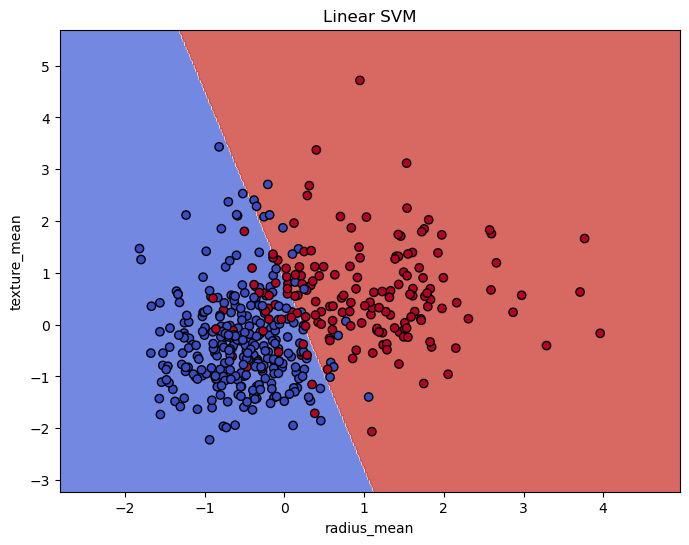

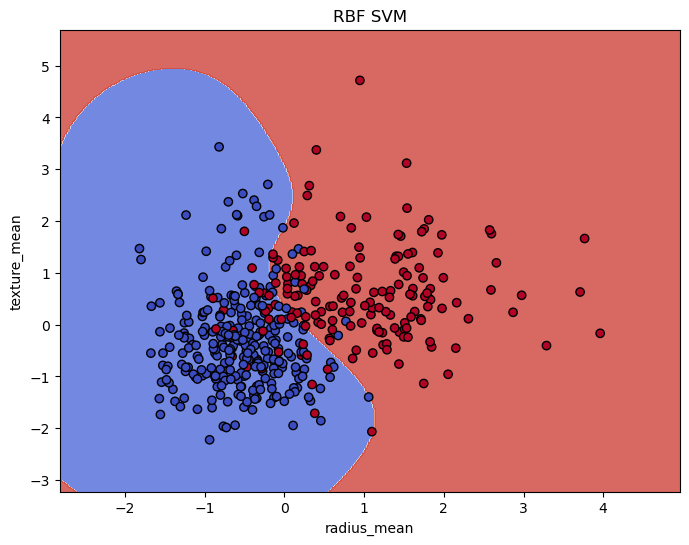

In [8]:
#Visualizing Decision Boundaries
import numpy as np
import matplotlib.pyplot as plt

def plot_svm(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.show()

# Ploting decision boundaries
plot_svm(linear_svm, X_train_scaled, y_train, "Linear SVM")
plot_svm(rbf_svm, X_train_scaled, y_train, "RBF SVM")


In [10]:
#Tune Hyperparameters (C & gamma)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [11]:
#Evaluating Performance
from sklearn.metrics import accuracy_score, classification_report

y_pred = grid.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9122807017543859
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.88      0.88      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

